In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd

In [22]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [24]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [26]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [93]:
# query for dates after 2016-08-23
precipitation = session.query(measurement.date, measurement.prcp).filter(func.strftime('%Y-%m-%d', measurement.date) >= '2016-08-23').order_by(measurement.date).all()

# create df
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])

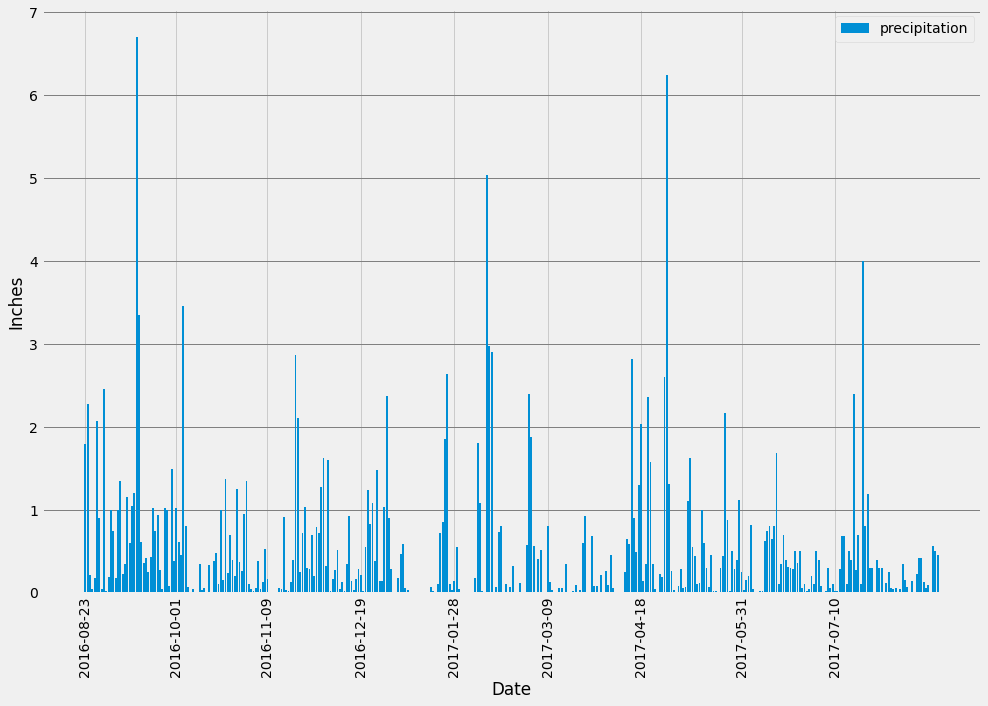

In [94]:
# size plot
plt.figure(figsize=(15,10))

# create plot
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'])

# labels
plt.xlabel('Date')
plt.ylabel('Inches')

# legened
plt.legend(['precipitation'])

# grid
plt.grid(which='major', axis='y', color='grey')

# ticks
plt.xticks(ticks=['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'], rotation=90)
plt.yticks()

plt.show()

In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [67]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.id)).all()

[(9)]

In [68]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_temp

[(54.0, 85.0, 71.66378066378067)]

In [87]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').all()
#temp_obs

In [86]:
# create df
tobs_df = pd.DataFrame(temp_obs, columns=['tobs'])
tobs_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


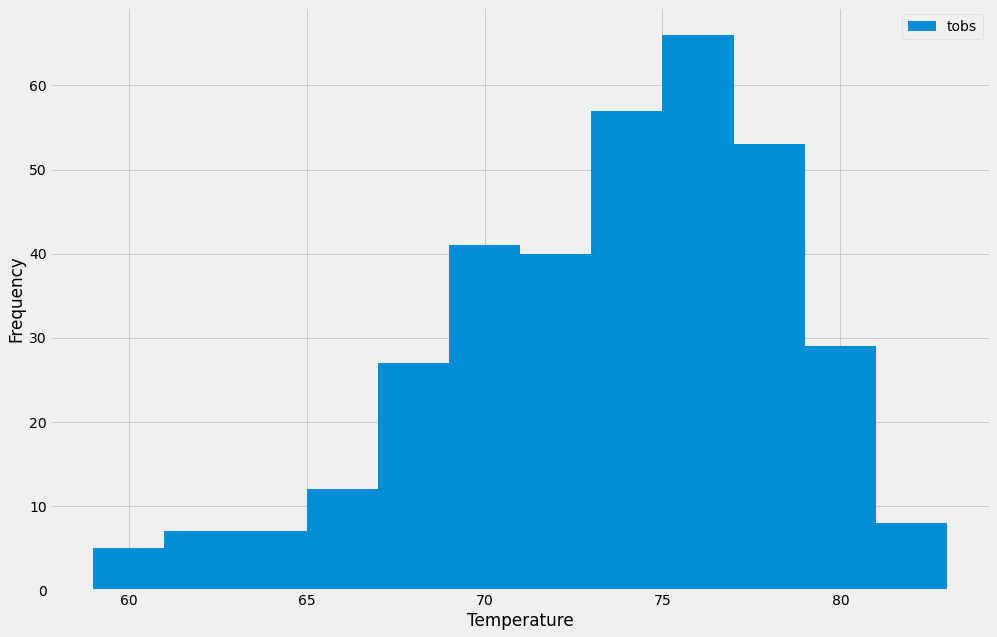

In [91]:
# size plot
plt.figure(figsize = (15,10))

# create plot
plt.hist(tobs_df['tobs'], bins = 12)

#labels
plt.ylabel('Frequency')
plt.xlabel('Temperature')

# legened
plt.legend(['tobs'])

plt.show()